In [ ]:
#%matplotlib inlinne
#%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
from torchvision import datasets, transforms
import helper
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F


In [13]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes. '''
    ps = ps.data.numpy().squeeze()
    
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.set_title('Image')
    ax1.axis('off')
    
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    
    plt.tight_layout()

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5),(0.5))])

In [3]:
trainset = datasets.MNIST('MNIST_data/',download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('MNIST_data/',download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [4]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)
        x = F.softmax(x, dim=1)

        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [5]:
model.fc1.bias

Parameter containing:
tensor([-0.0090, -0.0335, -0.0278,  0.0348, -0.0249, -0.0203, -0.0162,  0.0220,
        -0.0038, -0.0092,  0.0200, -0.0089, -0.0118, -0.0333, -0.0198, -0.0145,
         0.0210, -0.0076, -0.0264,  0.0080,  0.0107,  0.0042,  0.0103,  0.0249,
         0.0328, -0.0009,  0.0038,  0.0244, -0.0291, -0.0288,  0.0314, -0.0164,
        -0.0114,  0.0251,  0.0181,  0.0338,  0.0128,  0.0096,  0.0184, -0.0190,
         0.0107,  0.0023,  0.0252,  0.0145, -0.0131, -0.0172,  0.0043,  0.0012,
        -0.0036, -0.0333, -0.0108, -0.0250,  0.0343, -0.0314, -0.0157, -0.0228,
         0.0320, -0.0023,  0.0183, -0.0067, -0.0091, -0.0193,  0.0184,  0.0152,
         0.0102, -0.0174,  0.0008,  0.0299, -0.0118, -0.0090, -0.0206, -0.0355,
         0.0219, -0.0341, -0.0043,  0.0310,  0.0181, -0.0181, -0.0119,  0.0040,
         0.0151,  0.0264, -0.0208, -0.0321, -0.0016,  0.0032, -0.0281, -0.0334,
        -0.0074,  0.0239, -0.0264, -0.0234,  0.0174, -0.0336, -0.0044, -0.0203,
         0.0179,  

In [6]:
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
images[0].shape

torch.Size([1, 784])

In [11]:
ps = model.forward(images[0])

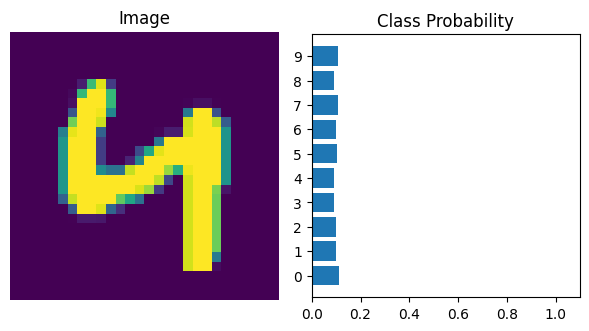

In [14]:
view_classify(images[0].view(1,28,28), ps)